In [13]:
import numpy as np
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x1b045ec8a10>, (300, 300, 4))

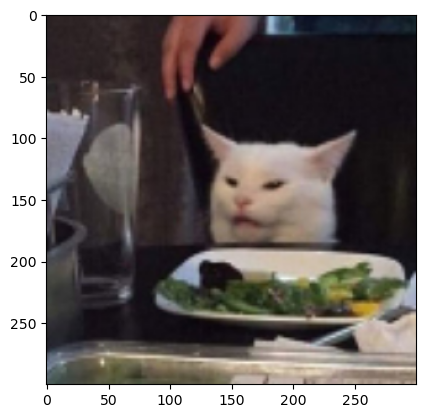

In [22]:
image = plt.imread('testImg.png')

filter = np.array([[1, -1, 0],
                   [1, -1, 0],
                   [1, -1, 0]], dtype=float)

plt.imshow(image), image.shape

(<matplotlib.image.AxesImage at 0x1b0437cd450>,
 array([[ 0.   , -0.024, -0.02 , ..., -0.016, -0.004,  0.   ],
        [ 0.   , -0.024, -0.016, ..., -0.02 , -0.012, -0.012],
        [ 0.   , -0.024, -0.012, ..., -0.02 , -0.024, -0.02 ],
        ...,
        [ 0.012,  0.047,  0.051, ...,  0.031, -0.004, -0.008],
        [ 0.008,  0.035,  0.043, ...,  0.059, -0.035, -0.047],
        [ 0.004,  0.027,  0.027, ...,  0.09 , -0.075, -0.098]]))

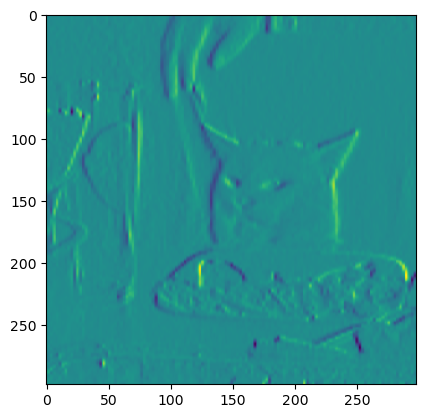

In [15]:
imageRed = image[:, :, 0]
inputRows, inputColumns = imageRed.shape
imageDecrease = filter.shape[0] - 1

newImg = np.ndarray([inputRows-imageDecrease, inputColumns-imageDecrease])

for i in range(inputRows)[imageDecrease//2: -imageDecrease//2]:
    for j in range(inputColumns)[imageDecrease//2: -imageDecrease//2]:
        newImg[i - int(imageDecrease/2), j - int(imageDecrease/2)] = np.vdot(filter, imageRed[i-1:i+2, j-1:j+2])

plt.imshow(newImg), newImg.round(3)

In [16]:
imageRed.shape
imageRed[4-1:4+2, 4-1:4+2]

array([[0.16470589, 0.16862746, 0.17254902],
       [0.16470589, 0.16862746, 0.17254902],
       [0.16862746, 0.17254902, 0.1764706 ]], dtype=float32)

In [17]:
newImg

array([[ 0.        , -0.02352941, -0.01960784, ..., -0.01568627,
        -0.00392157,  0.        ],
       [ 0.        , -0.02352941, -0.01568627, ..., -0.01960784,
        -0.01176471, -0.01176471],
       [ 0.        , -0.02352941, -0.01176471, ..., -0.01960785,
        -0.02352941, -0.01960784],
       ...,
       [ 0.01176471,  0.04705882,  0.05098039, ...,  0.03137255,
        -0.00392157, -0.00784314],
       [ 0.00784314,  0.03529412,  0.04313725, ...,  0.05882353,
        -0.03529412, -0.04705882],
       [ 0.00392157,  0.02745098,  0.02745098, ...,  0.09019607,
        -0.0745098 , -0.09803921]])

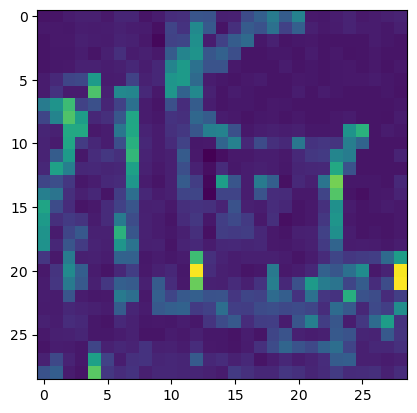

In [21]:
downScale = 10

downScaledImage = np.ndarray([int(newImg.shape[0] / downScale), int(newImg.shape[1] / downScale)])

input = newImg
input = np.hstack([input, np.zeros([input.shape[0], downScale - input.shape[1] % downScale])])
input = np.vstack([input, np.zeros([downScale - input.shape[0] % downScale, input.shape[1]])])
for i in range(downScaledImage.shape[1]):
    for j in range(downScaledImage.shape[0]):
        downScaledImage[i, j] = np.max(input[i*downScale: i*downScale + downScale, j*downScale: j*downScale + downScale])

plt.imshow(downScaledImage)

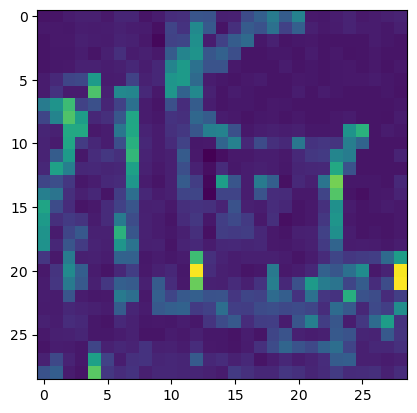

In [26]:
downScale = 10

downScaledImage = np.ndarray([int(newImg.shape[0] / downScale), int(newImg.shape[1] / downScale)])

input = newImg
input = np.hstack([input, np.zeros([input.shape[0], downScale - input.shape[1] % downScale])])
input = np.vstack([input, np.zeros([downScale - input.shape[0] % downScale, input.shape[1]])])

for i in range(downScaledImage.shape[1]):
    for j in range(downScaledImage.shape[0]):
        row = i*downScale
        col = j*downScale
        downScaledImage[i, j] = np.max(input[row: row + downScale, col: col + downScale])

plt.imshow(downScaledImage)

In [19]:
i=1
j=1
input[i*downScale: i*downScale + 4, j*downScale: j*downScale + 4], np.max(input[i*downScale: i*downScale + 4, j*downScale: j*downScale + 4])

(array([[-0.01176471, -0.00784314,  0.        , -0.00392157],
        [-0.01568627, -0.00392157, -0.00392157,  0.        ],
        [-0.01960784, -0.00784314, -0.00392157,  0.        ],
        [-0.01960784, -0.00784314, -0.00392157,  0.        ]]),
 0.0)

In [20]:
"Hej".lower()

'hej'